<a href="https://colab.research.google.com/github/Prajwalsrinvas/advent_of_haystack_2024/blob/main/Day_4_AssemblyAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advent of Haystack - Day 4



 <img src='https://drive.google.com/uc?export=view&id=18kEuBq-sX6-GKHpEfYQyo2hyE0fFWoI_' width=300px>

## The Elf on a Mission: Sharing the Christmas Magic

*At the North Pole, where magic and technology danced hand in hand, Santa was preparing for Christmas. In his workshop filled with glowing gadgets and humming machines, he summoned Elf Patrick, one of the most tech-savvy elves.*

*“Elf Patrick,” Santa said with a chuckle, “this year, I want you to share the story of how I became Santa Claus. But here's the twist—you'll use coding to help you create the perfect versions of the story for all kinds of kids.”*

*Elf Patrick's eyes sparkled. “Coding? That's my jam, Santa! I'll make sure your story is ready for everyone, no matter how they like it told!”*

*Santa handed Elf Patrick the audio file. “Start by transcribing it, then simplify it, and finally, remix it into that fun Gen Z lingo I keep hearing about.”*

*“Consider it done!” Elf Patrick declared, racing to the North Pole Coding Hub.*




## Preparations

*To complete the task, you need to get two requirements for Elf Patrick:*

- A free [AssemblyAI API key](https://www.assemblyai.com/dashboard/signup)
- An LLM. Here we use an [OpenAI API key](https://platform.openai.com/), but you can choose any other LLM that is supported with [Haystack Generators](https://docs.haystack.deepset.ai/docs/generators)

*Read the following resources to be prepared for the tasks:*
- [Haystack docs - AssemblyAI integration](https://haystack.deepset.ai/integrations/assemblyai)
- [Haystack docs - Creating pipelines](https://docs.haystack.deepset.ai/docs/creating-pipelines)

## Task 1: Transcribing Santa's Story


*Elf Patrick plugged the audio file into the North Pole's enchanted computer, powered by both logic and Christmas magic. Elf Patrick knew [Haystack](https://haystack.deepset.ai/) in combination with the [assemblyai-haystack integration](https://github.com/AssemblyAI/assemblyai-haystack) would make this task easy. Before getting started, Elf Patrick needs to install the required packages and configure the AssemblyAI API key:*

In [1]:
%%bash
pip install -q haystack-ai
pip install -q assemblyai-haystack
pip install -q --upgrade openai # not to get the OpenAI proxies error: https://community.openai.com/t/error-with-openai-1-56-0-client-init-got-an-unexpected-keyword-argument-proxies/1040332/2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.4/391.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 10.6 MB/s eta 0:00:00


In [2]:
from getpass import getpass

ASSEMBLYAI_API_KEY = getpass("Enter AssemblyAI Api key: ")

Enter AssemblyAI Api key: ··········


*With a few lines of Python, the elf ran the `AssemblyAITranscriber` with the given audio file:*

(Credits: The audio is from this [YouTube video](https://youtu.be/lrutxppbBQ8?si=80L9ULtVJD4mK9vc))

In [3]:
from assemblyai_haystack.transcriber import AssemblyAITranscriber

audio_file = "https://assembly.ai/story-of-santa-claus.mp3"



transcriber = AssemblyAITranscriber(api_key=ASSEMBLYAI_API_KEY)

result = transcriber.run(audio_file)



☝*Run the next cell. Soon, the screen lit up with the text of Santa's tale:*

In [6]:
from IPython.display import display, Markdown


In [7]:
display(Markdown(result["transcription"][0].content))

The Story of Santa Claus There once lived a wealthy and rich man named Nicholas who lived in the North Pole. He was a kind, generous man. Nicholas enjoyed surprising people, and he often did things to make others happy. Nicholas had a special hobby. He would carve out pretty wooden toys in his free time. But no one ever saw these toys. It was Christmas time, and Nicholas wanted to do something special for the children around him. While sitting in his chair one morning, he suddenly had an idea. Nicholas was going to carve many beautiful toys for all the little boys and girls. Christmas presents. He would go climb up the chimney of all the houses and drop presents into the stockings that hung near the fireplace. Late that night, while everyone slept, Nicholas crept towards a nearby house and climbed to the top of the roof. He threw a toy into the chimney and quickly climbed back down. Nicholas did this to several houses, but after some time he became tired. He quickly went back to his house and pulled out his sleigh and tied them to his reindeers. Nicholas set back out into the snow and cold, but not for long. His sleigh got stuck in the snow. Nicholas was trying to pull the reindeers out of the snow when suddenly an angel appeared. The angel said, nicholas, you are a good man and I want to help you. The angel touched the reindeers and said, now these reindeers are special. They will be able to fly. The angel then waved her hand and a group of small elves appear. They were dressed in green clothes, wore tall green hats and had long, funny ears. They will deliver gifts and bring happiness to many children. They are also fast and will help you make all kinds of toys. Nicholas was in shock, but was very, very happ. Everyone got into the sleigh and with one shake of the ropes, the reindeer took off into the sky, flying high to spread Christmas love and cheer. Nicholas said, merry Christmas to all and to all a good night. The next morning, the children woke up and ran to the fireplace. They pulled off the gifts from the stockings and screamed with joy. Mummy. Someone magically put a gift in our stocking. It's a beautiful toy. And that is the story of how Nicholas became Santa Claus. He now is the man we know on a Christmas long ago.

*“Step one, complete!” Elf Patrick grinned. “The story is ready to read!”*

## Task 2: Summarizing Santa's Tale

*Elf Patrick knew some kids wouldn’t want to sit through the whole story. “Time to code a quick summary!” The elf used the `summarization` feature of the `AssemblyAITranscriber` to make the story shorter:*

In [8]:
result = transcriber.run(
    audio_file,summarization=True
)

In [9]:
result

{'transcription': [Document(id=623ea4ab579973dc4870a55c5684f23c4c8db4d013919d7a5152c7245b01963a, content: 'The Story of Santa Claus There once lived a wealthy and rich man named Nicholas who lived in the Nor...', meta: {'transcript_id': 'd0a4b062-3bb2-49d8-9474-6b4ccdfa32ee', 'audio_url': 'https://assembly.ai/story-of-santa-claus.mp3'})],
 'summarization': [Document(id=7f787bf8b844f25c8feaccde126edfe8980e24c6fa5c6a773459e98c2b57d768, content: '- The Story of Santa Claus. There once lived a wealthy and rich man named Nicholas who lived in the ...')]}

In [10]:
display(Markdown(result["summarization"][0].content))

# The transcript can be accessed the same way as before:
# print(result["transcription"][0].content)

- The Story of Santa Claus. There once lived a wealthy and rich man named Nicholas who lived in the North Pole. He would climb up the chimney of all the houses and drop presents into the stockings that hung near the fireplace. The next morning, the children woke up and ran to the fireplace to find gifts.

*The output appeared. Elf Patrick nodded, satisfied. “That's perfect for the kids who just want the highlights!”*

## Task 3: Rewriting for Gen Z Kids

*Finally, Elf Patrick tackled the most creative part: making Santa's story fun and relatable for today's kids. “Time to bring in some humor!” Using an LLM and a Haystack pipeline, the elf coded this quirky transformation:*

In [11]:
from getpass import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass("Enter OpenAI Api key: ")

Enter OpenAI Api key: ··········


In [12]:
from assemblyai_haystack.transcriber import AssemblyAITranscriber
from haystack import Pipeline
from haystack.utils import Secret
from haystack.components.builders import PromptBuilder
from haystack.components.generators import OpenAIGenerator

# Setting up the prompt, the transcriber, and the llm:
template = """
Modify the tone of the transcribed story and transform it into Gen Z language.
Return only the modified story without a preface.

Transcript:
{{transcription}}
"""

prompt_builder = PromptBuilder(template=template)

transcriber = AssemblyAITranscriber(api_key=ASSEMBLYAI_API_KEY)

llm = OpenAIGenerator(model="gpt-4o")



pipe = Pipeline()
pipe.add_component("transcriber", transcriber)
pipe.add_component("prompt_builder",prompt_builder)
pipe.add_component("llm",llm)


pipe.connect("transcriber.transcription", "prompt_builder.transcription")
pipe.connect(
    "prompt_builder","llm"
)



🚅 Components
  - transcriber: AssemblyAITranscriber
  - prompt_builder: PromptBuilder
  - llm: OpenAIGenerator
🛤️ Connections
  - transcriber.transcription -> prompt_builder.transcription (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)

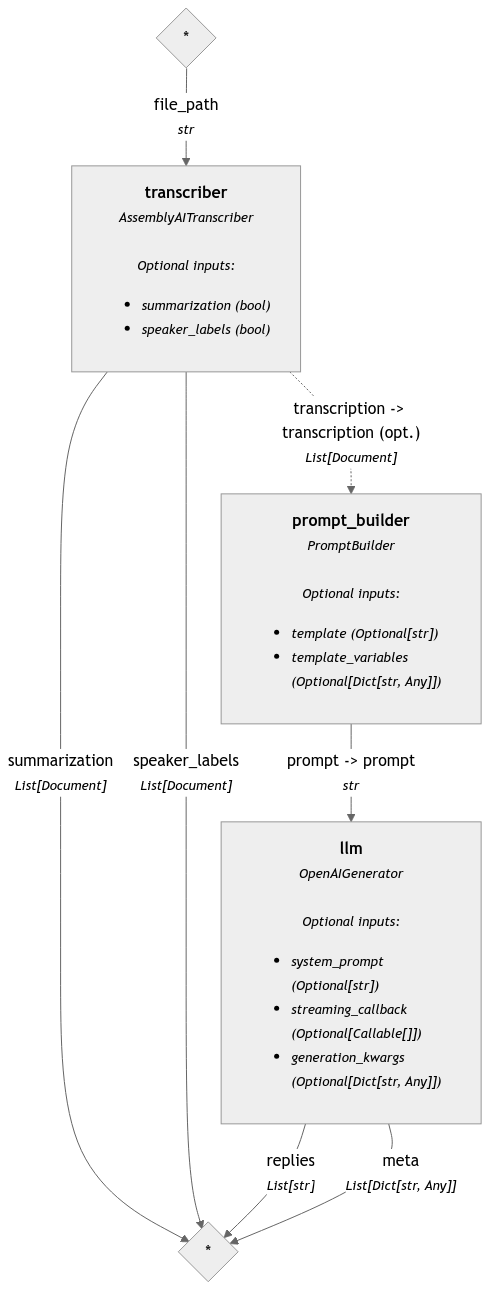

In [13]:
pipe.show()

*After the Pipeline was configured, Elf Patrick could run the whole pipeline and review the final output:*

☝Run the next cell.

In [17]:
audio_file = "https://assembly.ai/story-of-santa-claus.mp3"
res = pipe.run(
    {
        "transcriber": {
            "file_path": audio_file,
        }
    }
)

display(Markdown(res["llm"]["replies"][0]))

Story of Santa Claus

So, back in the day, there was this dude Nicholas, who was seriously loaded and living his best life in the North or something. But even with all that bling, Nick was, like, super generous. He’d go around low-key helping people out, especially kids who needed a hand. He wasn’t about that clout, more about spreading good vibes.

Legend has it, when folks were struggling, especially around the holidays, Nicholas would sneak around dropping gifts and whatnot. Dude was basically the OG Santa. He was doing this whole spreading joy thing way before it was cool, and people were massively into it. Word spread, and now we’ve got this entire Santa Claus lore happening.

Nick’s story grew, and of course, people started putting their own spin on it. But at the core, it’s all about giving without expecting anything back. So next time you see Santa chilling in the mall or whatever, remember it all started with a rich guy just trying to make the world a better place one small act of kindness at a time. 🎅✨

*Elf Patrick giggled. “This will be a hit!”*

## Conclusion

*Elf Patrick presented the outputs to Santa:*

1. *The Full Story - Transcribed using the [assemblyai-haystack integration](https://github.com/AssemblyAI/assemblyai-haystack) and the `AssemblyAITranscriber`*.
2. *The Summary - Also created with the `AssemblyAITranscriber` and `summarization` enabled.*
3. *The Gen Z Remix - Generated with a Haystack pipeline consisting of the transcriber, a prompt builder, and an LLM generator.*

*Santa read through each version, his cheeks glowing with pride. “Elf Patrick, you've done a wonderful job. You've used your coding skills to make the magic of Christmas accessible to every child. That's the true spirit of the season!”*

*Elf Patrick beamed, “Anything for Christmas, Santa!”*

*With the stories loaded onto Elf Patrick's USB drive, the elf set off to share Santa's tale with kids around the world. Using their storytelling program, Elf Patrick spread joy, laughter, and a little Christmas coding magic wherever they went.*

*The end.*

 <img src='https://drive.google.com/uc?export=view&id=1H7GdZJJZ0Mp3QOEE1tZVz5LvkRQuCJGd' width=300px>
